In [1]:
import numpy as np
import pandas as pd
from keras.callbacks import EarlyStopping
from keras.layers import Dense, Dropout, Input
from keras.models import Model, load_model
from keras.optimizers import adam_v2
from sklearn.datasets import fetch_california_housing
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.optimizers.schedules import ExponentialDecay
from tensorflow.keras.utils import set_random_seed

from utils import rmse as calc_rmse
from utils import plot_loss

set_random_seed(42)

In [2]:
X, y = fetch_california_housing(return_X_y=True)
n = len(X)//10
X_dev, X_test, y_dev, y_test = train_test_split(X, y, test_size=n, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_dev, y_dev, test_size=n, random_state=42)
X_train.shape, y_val.shape, y_test.shape

scaler = MinMaxScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_val = scaler.transform(X_val)
X_test = scaler.transform(X_test)

# y_scaler = MinMaxScaler()
# y_scaler.fit(y_train.reshape(-1, 1))
# y_train = y_scaler.transform(y_train.reshape(-1, 1)).flatten()
# y_val = y_scaler.transform(y_val.reshape(-1, 1)).flatten()
# y_test = y_scaler.transform(y_test.reshape(-1, 1)).flatten()

In [3]:
X_test.shape

(2064, 8)

# Model

In [5]:
def build_model(shape=8, lr=0.0001, activation="relu", out_activation=None):
    x = Input(shape=(shape))
    h = Dense(32, activation=activation)(x)
    h = Dense(16, activation=activation)(h)
    h = Dense(8, activation=activation)(h)
    h = Dense(4, activation=activation)(h)
    h = Dense(2, activation=activation)(h)
    out = Dense(1, activation=out_activation)(h)

    model = Model(inputs=x, outputs=out)
    
    lr_schedule = ExponentialDecay(
    lr,
    decay_steps=10000,
    decay_rate=0.96,
    staircase=True)
    
    model.compile(loss="mse", optimizer=adam_v2.Adam(learning_rate=lr_schedule))
    return model

In [6]:
model = build_model(activation="relu", lr=0.0001)
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 8)]               0         
                                                                 
 dense (Dense)               (None, 32)                288       
                                                                 
 dense_1 (Dense)             (None, 16)                528       
                                                                 
 dense_2 (Dense)             (None, 8)                 136       
                                                                 
 dense_3 (Dense)             (None, 4)                 36        
                                                                 
 dense_4 (Dense)             (None, 2)                 10        
                                                                 
 dense_5 (Dense)             (None, 1)                 3     

2022-01-26 18:23:38.735544: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:939] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-01-26 18:23:38.879443: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:939] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-01-26 18:23:38.879574: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:939] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-01-26 18:23:38.881207: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags

# Training

In [7]:
es = EarlyStopping(patience=100, restore_best_weights=True)
H = model.fit(x=X_train, y=y_train, validation_data=(X_val, y_val), epochs=10000, batch_size=2752, callbacks=[es])

Epoch 1/10000
6/6 [==============================] - 2s 20ms/step - loss: 5.4361 - val_loss: 5.2483
Epoch 2/10000
6/6 [==============================] - 0s 3ms/step - loss: 5.3971 - val_loss: 5.2081
Epoch 3/10000
6/6 [==============================] - 0s 3ms/step - loss: 5.3557 - val_loss: 5.1649
Epoch 4/10000
6/6 [==============================] - 0s 3ms/step - loss: 5.3112 - val_loss: 5.1177


2022-01-26 18:23:42.787691: I tensorflow/stream_executor/cuda/cuda_blas.cc:1774] TensorFloat-32 will be used for the matrix multiplication. This will only be logged once.


Epoch 5/10000
6/6 [==============================] - 0s 3ms/step - loss: 5.2613 - val_loss: 5.0648
Epoch 6/10000
6/6 [==============================] - 0s 3ms/step - loss: 5.2062 - val_loss: 5.0078
Epoch 7/10000
6/6 [==============================] - 0s 3ms/step - loss: 5.1470 - val_loss: 4.9477
Epoch 8/10000
6/6 [==============================] - 0s 3ms/step - loss: 5.0847 - val_loss: 4.8851
Epoch 9/10000
6/6 [==============================] - 0s 3ms/step - loss: 5.0201 - val_loss: 4.8208
Epoch 10/10000
6/6 [==============================] - 0s 3ms/step - loss: 4.9542 - val_loss: 4.7553
Epoch 11/10000
6/6 [==============================] - 0s 3ms/step - loss: 4.8868 - val_loss: 4.6883
Epoch 12/10000
6/6 [==============================] - 0s 3ms/step - loss: 4.8183 - val_loss: 4.6203
Epoch 13/10000
6/6 [==============================] - 0s 4ms/step - loss: 4.7486 - val_loss: 4.5515
Epoch 14/10000
6/6 [==============================] - 0s 4ms/step - loss: 4.6785 - val_loss: 4.4819
Epoch

Epoch 87/10000
6/6 [==============================] - 0s 3ms/step - loss: 1.2616 - val_loss: 1.2228
Epoch 88/10000
6/6 [==============================] - 0s 3ms/step - loss: 1.2565 - val_loss: 1.2191
Epoch 89/10000
6/6 [==============================] - 0s 3ms/step - loss: 1.2521 - val_loss: 1.2157
Epoch 90/10000
6/6 [==============================] - 0s 3ms/step - loss: 1.2480 - val_loss: 1.2125
Epoch 91/10000
6/6 [==============================] - 0s 3ms/step - loss: 1.2442 - val_loss: 1.2095
Epoch 92/10000
6/6 [==============================] - 0s 3ms/step - loss: 1.2406 - val_loss: 1.2068
Epoch 93/10000
6/6 [==============================] - 0s 3ms/step - loss: 1.2372 - val_loss: 1.2042
Epoch 94/10000
6/6 [==============================] - 0s 3ms/step - loss: 1.2339 - val_loss: 1.2018
Epoch 95/10000
6/6 [==============================] - 0s 3ms/step - loss: 1.2310 - val_loss: 1.1994
Epoch 96/10000
6/6 [==============================] - 0s 3ms/step - loss: 1.2281 - val_loss: 1.1972


6/6 [==============================] - 0s 3ms/step - loss: 0.7783 - val_loss: 0.7929
Epoch 250/10000
6/6 [==============================] - 0s 3ms/step - loss: 0.7744 - val_loss: 0.7894
Epoch 251/10000
6/6 [==============================] - 0s 3ms/step - loss: 0.7705 - val_loss: 0.7859
Epoch 252/10000
6/6 [==============================] - 0s 3ms/step - loss: 0.7668 - val_loss: 0.7824
Epoch 253/10000
6/6 [==============================] - 0s 3ms/step - loss: 0.7630 - val_loss: 0.7790
Epoch 254/10000
6/6 [==============================] - 0s 3ms/step - loss: 0.7593 - val_loss: 0.7757
Epoch 255/10000
6/6 [==============================] - 0s 3ms/step - loss: 0.7557 - val_loss: 0.7724
Epoch 256/10000
6/6 [==============================] - 0s 3ms/step - loss: 0.7521 - val_loss: 0.7691
Epoch 257/10000
6/6 [==============================] - 0s 3ms/step - loss: 0.7486 - val_loss: 0.7659
Epoch 258/10000
6/6 [==============================] - 0s 3ms/step - loss: 0.7451 - val_loss: 0.7626
Epoch 

6/6 [==============================] - 0s 3ms/step - loss: 0.5653 - val_loss: 0.6033
Epoch 412/10000
6/6 [==============================] - 0s 3ms/step - loss: 0.5651 - val_loss: 0.6031
Epoch 413/10000
6/6 [==============================] - 0s 3ms/step - loss: 0.5648 - val_loss: 0.6028
Epoch 414/10000
6/6 [==============================] - 0s 3ms/step - loss: 0.5646 - val_loss: 0.6026
Epoch 415/10000
6/6 [==============================] - 0s 3ms/step - loss: 0.5644 - val_loss: 0.6024
Epoch 416/10000
6/6 [==============================] - 0s 3ms/step - loss: 0.5642 - val_loss: 0.6022
Epoch 417/10000
6/6 [==============================] - 0s 3ms/step - loss: 0.5640 - val_loss: 0.6020
Epoch 418/10000
6/6 [==============================] - 0s 3ms/step - loss: 0.5637 - val_loss: 0.6017
Epoch 419/10000
6/6 [==============================] - 0s 3ms/step - loss: 0.5635 - val_loss: 0.6015
Epoch 420/10000
6/6 [==============================] - 0s 3ms/step - loss: 0.5633 - val_loss: 0.6013
Epoch 

6/6 [==============================] - 0s 4ms/step - loss: 0.5294 - val_loss: 0.5663
Epoch 574/10000
6/6 [==============================] - 0s 4ms/step - loss: 0.5292 - val_loss: 0.5661
Epoch 575/10000
6/6 [==============================] - 0s 4ms/step - loss: 0.5290 - val_loss: 0.5659
Epoch 576/10000
6/6 [==============================] - 0s 4ms/step - loss: 0.5288 - val_loss: 0.5656
Epoch 577/10000
6/6 [==============================] - 0s 4ms/step - loss: 0.5286 - val_loss: 0.5654
Epoch 578/10000
6/6 [==============================] - 0s 4ms/step - loss: 0.5283 - val_loss: 0.5652
Epoch 579/10000
6/6 [==============================] - 0s 4ms/step - loss: 0.5281 - val_loss: 0.5649
Epoch 580/10000
6/6 [==============================] - 0s 4ms/step - loss: 0.5279 - val_loss: 0.5646
Epoch 581/10000
6/6 [==============================] - 0s 4ms/step - loss: 0.5277 - val_loss: 0.5644
Epoch 582/10000
6/6 [==============================] - 0s 4ms/step - loss: 0.5274 - val_loss: 0.5642
Epoch 

6/6 [==============================] - 0s 4ms/step - loss: 0.4906 - val_loss: 0.5267
Epoch 736/10000
6/6 [==============================] - 0s 3ms/step - loss: 0.4904 - val_loss: 0.5264
Epoch 737/10000
6/6 [==============================] - 0s 3ms/step - loss: 0.4902 - val_loss: 0.5262
Epoch 738/10000
6/6 [==============================] - 0s 3ms/step - loss: 0.4900 - val_loss: 0.5259
Epoch 739/10000
6/6 [==============================] - 0s 3ms/step - loss: 0.4898 - val_loss: 0.5257
Epoch 740/10000
6/6 [==============================] - 0s 3ms/step - loss: 0.4895 - val_loss: 0.5255
Epoch 741/10000
6/6 [==============================] - 0s 3ms/step - loss: 0.4893 - val_loss: 0.5252
Epoch 742/10000
6/6 [==============================] - 0s 3ms/step - loss: 0.4890 - val_loss: 0.5250
Epoch 743/10000
6/6 [==============================] - 0s 3ms/step - loss: 0.4890 - val_loss: 0.5248
Epoch 744/10000
6/6 [==============================] - 0s 4ms/step - loss: 0.4886 - val_loss: 0.5246
Epoch 

6/6 [==============================] - 0s 3ms/step - loss: 0.4613 - val_loss: 0.4946
Epoch 898/10000
6/6 [==============================] - 0s 4ms/step - loss: 0.4612 - val_loss: 0.4945
Epoch 899/10000
6/6 [==============================] - 0s 4ms/step - loss: 0.4610 - val_loss: 0.4943
Epoch 900/10000
6/6 [==============================] - 0s 4ms/step - loss: 0.4610 - val_loss: 0.4941
Epoch 901/10000
6/6 [==============================] - 0s 4ms/step - loss: 0.4609 - val_loss: 0.4940
Epoch 902/10000
6/6 [==============================] - 0s 3ms/step - loss: 0.4606 - val_loss: 0.4939
Epoch 903/10000
6/6 [==============================] - 0s 3ms/step - loss: 0.4606 - val_loss: 0.4936
Epoch 904/10000
6/6 [==============================] - 0s 3ms/step - loss: 0.4604 - val_loss: 0.4935
Epoch 905/10000
6/6 [==============================] - 0s 3ms/step - loss: 0.4602 - val_loss: 0.4933
Epoch 906/10000
6/6 [==============================] - 0s 4ms/step - loss: 0.4601 - val_loss: 0.4932
Epoch 

6/6 [==============================] - 0s 4ms/step - loss: 0.4426 - val_loss: 0.4739
Epoch 1059/10000
6/6 [==============================] - 0s 4ms/step - loss: 0.4425 - val_loss: 0.4739
Epoch 1060/10000
6/6 [==============================] - 0s 3ms/step - loss: 0.4424 - val_loss: 0.4737
Epoch 1061/10000
6/6 [==============================] - 0s 3ms/step - loss: 0.4424 - val_loss: 0.4737
Epoch 1062/10000
6/6 [==============================] - 0s 4ms/step - loss: 0.4422 - val_loss: 0.4735
Epoch 1063/10000
6/6 [==============================] - 0s 4ms/step - loss: 0.4421 - val_loss: 0.4734
Epoch 1064/10000
6/6 [==============================] - 0s 4ms/step - loss: 0.4421 - val_loss: 0.4733
Epoch 1065/10000
6/6 [==============================] - 0s 4ms/step - loss: 0.4420 - val_loss: 0.4732
Epoch 1066/10000
6/6 [==============================] - 0s 3ms/step - loss: 0.4418 - val_loss: 0.4730
Epoch 1067/10000
6/6 [==============================] - 0s 4ms/step - loss: 0.4418 - val_loss: 0.47

6/6 [==============================] - 0s 3ms/step - loss: 0.4289 - val_loss: 0.4589
Epoch 1219/10000
6/6 [==============================] - 0s 3ms/step - loss: 0.4288 - val_loss: 0.4587
Epoch 1220/10000
6/6 [==============================] - 0s 3ms/step - loss: 0.4287 - val_loss: 0.4586
Epoch 1221/10000
6/6 [==============================] - 0s 3ms/step - loss: 0.4287 - val_loss: 0.4584
Epoch 1222/10000
6/6 [==============================] - 0s 3ms/step - loss: 0.4288 - val_loss: 0.4585
Epoch 1223/10000
6/6 [==============================] - 0s 3ms/step - loss: 0.4287 - val_loss: 0.4583
Epoch 1224/10000
6/6 [==============================] - 0s 3ms/step - loss: 0.4285 - val_loss: 0.4586
Epoch 1225/10000
6/6 [==============================] - 0s 3ms/step - loss: 0.4285 - val_loss: 0.4583
Epoch 1226/10000
6/6 [==============================] - 0s 3ms/step - loss: 0.4283 - val_loss: 0.4583
Epoch 1227/10000
6/6 [==============================] - 0s 3ms/step - loss: 0.4283 - val_loss: 0.45

6/6 [==============================] - 0s 3ms/step - loss: 0.4181 - val_loss: 0.4473
Epoch 1379/10000
6/6 [==============================] - 0s 3ms/step - loss: 0.4182 - val_loss: 0.4473
Epoch 1380/10000
6/6 [==============================] - 0s 3ms/step - loss: 0.4184 - val_loss: 0.4472
Epoch 1381/10000
6/6 [==============================] - 0s 4ms/step - loss: 0.4181 - val_loss: 0.4470
Epoch 1382/10000
6/6 [==============================] - 0s 3ms/step - loss: 0.4179 - val_loss: 0.4473
Epoch 1383/10000
6/6 [==============================] - 0s 4ms/step - loss: 0.4179 - val_loss: 0.4469
Epoch 1384/10000
6/6 [==============================] - 0s 3ms/step - loss: 0.4179 - val_loss: 0.4469
Epoch 1385/10000
6/6 [==============================] - 0s 4ms/step - loss: 0.4179 - val_loss: 0.4468
Epoch 1386/10000
6/6 [==============================] - 0s 3ms/step - loss: 0.4177 - val_loss: 0.4471
Epoch 1387/10000
6/6 [==============================] - 0s 4ms/step - loss: 0.4176 - val_loss: 0.44

6/6 [==============================] - 0s 3ms/step - loss: 0.4091 - val_loss: 0.4375
Epoch 1539/10000
6/6 [==============================] - 0s 3ms/step - loss: 0.4090 - val_loss: 0.4376
Epoch 1540/10000
6/6 [==============================] - 0s 3ms/step - loss: 0.4089 - val_loss: 0.4373
Epoch 1541/10000
6/6 [==============================] - 0s 3ms/step - loss: 0.4089 - val_loss: 0.4373
Epoch 1542/10000
6/6 [==============================] - 0s 3ms/step - loss: 0.4088 - val_loss: 0.4373
Epoch 1543/10000
6/6 [==============================] - 0s 3ms/step - loss: 0.4087 - val_loss: 0.4372
Epoch 1544/10000
6/6 [==============================] - 0s 3ms/step - loss: 0.4087 - val_loss: 0.4370
Epoch 1545/10000
6/6 [==============================] - 0s 3ms/step - loss: 0.4088 - val_loss: 0.4370
Epoch 1546/10000
6/6 [==============================] - 0s 3ms/step - loss: 0.4086 - val_loss: 0.4370
Epoch 1547/10000
6/6 [==============================] - 0s 3ms/step - loss: 0.4085 - val_loss: 0.43

6/6 [==============================] - 0s 3ms/step - loss: 0.4016 - val_loss: 0.4290
Epoch 1699/10000
6/6 [==============================] - 0s 3ms/step - loss: 0.4012 - val_loss: 0.4296
Epoch 1700/10000
6/6 [==============================] - 0s 3ms/step - loss: 0.4011 - val_loss: 0.4290
Epoch 1701/10000
6/6 [==============================] - 0s 3ms/step - loss: 0.4013 - val_loss: 0.4292
Epoch 1702/10000
6/6 [==============================] - 0s 3ms/step - loss: 0.4011 - val_loss: 0.4287
Epoch 1703/10000
6/6 [==============================] - 0s 3ms/step - loss: 0.4012 - val_loss: 0.4289
Epoch 1704/10000
6/6 [==============================] - 0s 3ms/step - loss: 0.4009 - val_loss: 0.4287
Epoch 1705/10000
6/6 [==============================] - 0s 3ms/step - loss: 0.4011 - val_loss: 0.4287
Epoch 1706/10000
6/6 [==============================] - 0s 3ms/step - loss: 0.4010 - val_loss: 0.4287
Epoch 1707/10000
6/6 [==============================] - 0s 3ms/step - loss: 0.4010 - val_loss: 0.42

6/6 [==============================] - 0s 3ms/step - loss: 0.3948 - val_loss: 0.4224
Epoch 1859/10000
6/6 [==============================] - 0s 3ms/step - loss: 0.3947 - val_loss: 0.4224
Epoch 1860/10000
6/6 [==============================] - 0s 3ms/step - loss: 0.3947 - val_loss: 0.4222
Epoch 1861/10000
6/6 [==============================] - 0s 3ms/step - loss: 0.3947 - val_loss: 0.4224
Epoch 1862/10000
6/6 [==============================] - 0s 3ms/step - loss: 0.3947 - val_loss: 0.4224
Epoch 1863/10000
6/6 [==============================] - 0s 3ms/step - loss: 0.3947 - val_loss: 0.4221
Epoch 1864/10000
6/6 [==============================] - 0s 3ms/step - loss: 0.3946 - val_loss: 0.4222
Epoch 1865/10000
6/6 [==============================] - 0s 3ms/step - loss: 0.3946 - val_loss: 0.4222
Epoch 1866/10000
6/6 [==============================] - 0s 3ms/step - loss: 0.3945 - val_loss: 0.4222
Epoch 1867/10000
6/6 [==============================] - 0s 3ms/step - loss: 0.3944 - val_loss: 0.42

6/6 [==============================] - 0s 4ms/step - loss: 0.3893 - val_loss: 0.4161
Epoch 2019/10000
6/6 [==============================] - 0s 3ms/step - loss: 0.3893 - val_loss: 0.4163
Epoch 2020/10000
6/6 [==============================] - 0s 3ms/step - loss: 0.3894 - val_loss: 0.4162
Epoch 2021/10000
6/6 [==============================] - 0s 3ms/step - loss: 0.3896 - val_loss: 0.4164
Epoch 2022/10000
6/6 [==============================] - 0s 3ms/step - loss: 0.3896 - val_loss: 0.4161
Epoch 2023/10000
6/6 [==============================] - 0s 3ms/step - loss: 0.3894 - val_loss: 0.4162
Epoch 2024/10000
6/6 [==============================] - 0s 3ms/step - loss: 0.3890 - val_loss: 0.4159
Epoch 2025/10000
6/6 [==============================] - 0s 3ms/step - loss: 0.3888 - val_loss: 0.4165
Epoch 2026/10000
6/6 [==============================] - 0s 3ms/step - loss: 0.3889 - val_loss: 0.4159
Epoch 2027/10000
6/6 [==============================] - 0s 3ms/step - loss: 0.3888 - val_loss: 0.41

6/6 [==============================] - 0s 3ms/step - loss: 0.3840 - val_loss: 0.4111
Epoch 2179/10000
6/6 [==============================] - 0s 3ms/step - loss: 0.3838 - val_loss: 0.4110
Epoch 2180/10000
6/6 [==============================] - 0s 4ms/step - loss: 0.3838 - val_loss: 0.4107
Epoch 2181/10000
6/6 [==============================] - 0s 4ms/step - loss: 0.3838 - val_loss: 0.4106
Epoch 2182/10000
6/6 [==============================] - 0s 3ms/step - loss: 0.3840 - val_loss: 0.4107
Epoch 2183/10000
6/6 [==============================] - 0s 3ms/step - loss: 0.3838 - val_loss: 0.4104
Epoch 2184/10000
6/6 [==============================] - 0s 3ms/step - loss: 0.3840 - val_loss: 0.4114
Epoch 2185/10000
6/6 [==============================] - 0s 3ms/step - loss: 0.3838 - val_loss: 0.4107
Epoch 2186/10000
6/6 [==============================] - 0s 3ms/step - loss: 0.3835 - val_loss: 0.4114
Epoch 2187/10000
6/6 [==============================] - 0s 4ms/step - loss: 0.3838 - val_loss: 0.41

6/6 [==============================] - 0s 4ms/step - loss: 0.3788 - val_loss: 0.4057
Epoch 2339/10000
6/6 [==============================] - 0s 3ms/step - loss: 0.3789 - val_loss: 0.4059
Epoch 2340/10000
6/6 [==============================] - 0s 4ms/step - loss: 0.3787 - val_loss: 0.4056
Epoch 2341/10000
6/6 [==============================] - 0s 3ms/step - loss: 0.3787 - val_loss: 0.4057
Epoch 2342/10000
6/6 [==============================] - 0s 4ms/step - loss: 0.3786 - val_loss: 0.4056
Epoch 2343/10000
6/6 [==============================] - 0s 3ms/step - loss: 0.3786 - val_loss: 0.4057
Epoch 2344/10000
6/6 [==============================] - 0s 4ms/step - loss: 0.3786 - val_loss: 0.4056
Epoch 2345/10000
6/6 [==============================] - 0s 3ms/step - loss: 0.3786 - val_loss: 0.4058
Epoch 2346/10000
6/6 [==============================] - 0s 4ms/step - loss: 0.3785 - val_loss: 0.4056
Epoch 2347/10000
6/6 [==============================] - 0s 3ms/step - loss: 0.3786 - val_loss: 0.40

6/6 [==============================] - 0s 4ms/step - loss: 0.3736 - val_loss: 0.4006
Epoch 2499/10000
6/6 [==============================] - 0s 3ms/step - loss: 0.3738 - val_loss: 0.4009
Epoch 2500/10000
6/6 [==============================] - 0s 4ms/step - loss: 0.3737 - val_loss: 0.4007
Epoch 2501/10000
6/6 [==============================] - 0s 4ms/step - loss: 0.3735 - val_loss: 0.4005
Epoch 2502/10000
6/6 [==============================] - 0s 3ms/step - loss: 0.3735 - val_loss: 0.4007
Epoch 2503/10000
6/6 [==============================] - 0s 4ms/step - loss: 0.3735 - val_loss: 0.4005
Epoch 2504/10000
6/6 [==============================] - 0s 4ms/step - loss: 0.3735 - val_loss: 0.4004
Epoch 2505/10000
6/6 [==============================] - 0s 4ms/step - loss: 0.3737 - val_loss: 0.4006
Epoch 2506/10000
6/6 [==============================] - 0s 4ms/step - loss: 0.3737 - val_loss: 0.4003
Epoch 2507/10000
6/6 [==============================] - 0s 3ms/step - loss: 0.3736 - val_loss: 0.40

6/6 [==============================] - 0s 4ms/step - loss: 0.3687 - val_loss: 0.3955
Epoch 2659/10000
6/6 [==============================] - 0s 3ms/step - loss: 0.3687 - val_loss: 0.3959
Epoch 2660/10000
6/6 [==============================] - 0s 3ms/step - loss: 0.3690 - val_loss: 0.3957
Epoch 2661/10000
6/6 [==============================] - 0s 3ms/step - loss: 0.3687 - val_loss: 0.3956
Epoch 2662/10000
6/6 [==============================] - 0s 4ms/step - loss: 0.3687 - val_loss: 0.3954
Epoch 2663/10000
6/6 [==============================] - 0s 4ms/step - loss: 0.3684 - val_loss: 0.3954
Epoch 2664/10000
6/6 [==============================] - 0s 4ms/step - loss: 0.3683 - val_loss: 0.3956
Epoch 2665/10000
6/6 [==============================] - 0s 4ms/step - loss: 0.3684 - val_loss: 0.3954
Epoch 2666/10000
6/6 [==============================] - 0s 3ms/step - loss: 0.3683 - val_loss: 0.3960
Epoch 2667/10000
6/6 [==============================] - 0s 3ms/step - loss: 0.3682 - val_loss: 0.39

6/6 [==============================] - 0s 3ms/step - loss: 0.3635 - val_loss: 0.3910
Epoch 2819/10000
6/6 [==============================] - 0s 4ms/step - loss: 0.3635 - val_loss: 0.3907
Epoch 2820/10000
6/6 [==============================] - 0s 3ms/step - loss: 0.3636 - val_loss: 0.3911
Epoch 2821/10000
6/6 [==============================] - 0s 3ms/step - loss: 0.3637 - val_loss: 0.3910
Epoch 2822/10000
6/6 [==============================] - 0s 3ms/step - loss: 0.3637 - val_loss: 0.3911
Epoch 2823/10000
6/6 [==============================] - 0s 4ms/step - loss: 0.3634 - val_loss: 0.3907
Epoch 2824/10000
6/6 [==============================] - 0s 4ms/step - loss: 0.3633 - val_loss: 0.3909
Epoch 2825/10000
6/6 [==============================] - 0s 4ms/step - loss: 0.3634 - val_loss: 0.3906
Epoch 2826/10000
6/6 [==============================] - 0s 3ms/step - loss: 0.3635 - val_loss: 0.3912
Epoch 2827/10000
6/6 [==============================] - 0s 3ms/step - loss: 0.3632 - val_loss: 0.39

6/6 [==============================] - 0s 4ms/step - loss: 0.3591 - val_loss: 0.3867
Epoch 2979/10000
6/6 [==============================] - 0s 3ms/step - loss: 0.3589 - val_loss: 0.3874
Epoch 2980/10000
6/6 [==============================] - 0s 4ms/step - loss: 0.3586 - val_loss: 0.3869
Epoch 2981/10000
6/6 [==============================] - 0s 3ms/step - loss: 0.3582 - val_loss: 0.3870
Epoch 2982/10000
6/6 [==============================] - 0s 4ms/step - loss: 0.3584 - val_loss: 0.3870
Epoch 2983/10000
6/6 [==============================] - 0s 3ms/step - loss: 0.3582 - val_loss: 0.3867
Epoch 2984/10000
6/6 [==============================] - 0s 3ms/step - loss: 0.3583 - val_loss: 0.3869
Epoch 2985/10000
6/6 [==============================] - 0s 3ms/step - loss: 0.3582 - val_loss: 0.3869
Epoch 2986/10000
6/6 [==============================] - 0s 4ms/step - loss: 0.3581 - val_loss: 0.3866
Epoch 2987/10000
6/6 [==============================] - 0s 3ms/step - loss: 0.3581 - val_loss: 0.38

6/6 [==============================] - 0s 4ms/step - loss: 0.3535 - val_loss: 0.3829
Epoch 3139/10000
6/6 [==============================] - 0s 3ms/step - loss: 0.3535 - val_loss: 0.3833
Epoch 3140/10000
6/6 [==============================] - 0s 4ms/step - loss: 0.3535 - val_loss: 0.3830
Epoch 3141/10000
6/6 [==============================] - 0s 3ms/step - loss: 0.3534 - val_loss: 0.3832
Epoch 3142/10000
6/6 [==============================] - 0s 4ms/step - loss: 0.3534 - val_loss: 0.3828
Epoch 3143/10000
6/6 [==============================] - 0s 3ms/step - loss: 0.3537 - val_loss: 0.3833
Epoch 3144/10000
6/6 [==============================] - 0s 3ms/step - loss: 0.3534 - val_loss: 0.3830
Epoch 3145/10000
6/6 [==============================] - 0s 3ms/step - loss: 0.3536 - val_loss: 0.3837
Epoch 3146/10000
6/6 [==============================] - 0s 4ms/step - loss: 0.3535 - val_loss: 0.3827
Epoch 3147/10000
6/6 [==============================] - 0s 3ms/step - loss: 0.3532 - val_loss: 0.38

6/6 [==============================] - 0s 3ms/step - loss: 0.3489 - val_loss: 0.3789
Epoch 3299/10000
6/6 [==============================] - 0s 4ms/step - loss: 0.3490 - val_loss: 0.3792
Epoch 3300/10000
6/6 [==============================] - 0s 3ms/step - loss: 0.3492 - val_loss: 0.3791
Epoch 3301/10000
6/6 [==============================] - 0s 4ms/step - loss: 0.3490 - val_loss: 0.3789
Epoch 3302/10000
6/6 [==============================] - 0s 4ms/step - loss: 0.3487 - val_loss: 0.3788
Epoch 3303/10000
6/6 [==============================] - 0s 3ms/step - loss: 0.3487 - val_loss: 0.3791
Epoch 3304/10000
6/6 [==============================] - 0s 3ms/step - loss: 0.3487 - val_loss: 0.3790
Epoch 3305/10000
6/6 [==============================] - 0s 4ms/step - loss: 0.3487 - val_loss: 0.3785
Epoch 3306/10000
6/6 [==============================] - 0s 3ms/step - loss: 0.3487 - val_loss: 0.3786
Epoch 3307/10000
6/6 [==============================] - 0s 3ms/step - loss: 0.3486 - val_loss: 0.37

6/6 [==============================] - 0s 3ms/step - loss: 0.3446 - val_loss: 0.3751
Epoch 3459/10000
6/6 [==============================] - 0s 3ms/step - loss: 0.3446 - val_loss: 0.3754
Epoch 3460/10000
6/6 [==============================] - 0s 3ms/step - loss: 0.3445 - val_loss: 0.3753
Epoch 3461/10000
6/6 [==============================] - 0s 4ms/step - loss: 0.3447 - val_loss: 0.3749
Epoch 3462/10000
6/6 [==============================] - 0s 3ms/step - loss: 0.3446 - val_loss: 0.3750
Epoch 3463/10000
6/6 [==============================] - 0s 3ms/step - loss: 0.3445 - val_loss: 0.3748
Epoch 3464/10000
6/6 [==============================] - 0s 3ms/step - loss: 0.3444 - val_loss: 0.3752
Epoch 3465/10000
6/6 [==============================] - 0s 3ms/step - loss: 0.3443 - val_loss: 0.3752
Epoch 3466/10000
6/6 [==============================] - 0s 3ms/step - loss: 0.3443 - val_loss: 0.3748
Epoch 3467/10000
6/6 [==============================] - 0s 4ms/step - loss: 0.3443 - val_loss: 0.37

6/6 [==============================] - 0s 4ms/step - loss: 0.3408 - val_loss: 0.3716
Epoch 3619/10000
6/6 [==============================] - 0s 3ms/step - loss: 0.3405 - val_loss: 0.3717
Epoch 3620/10000
6/6 [==============================] - 0s 3ms/step - loss: 0.3405 - val_loss: 0.3716
Epoch 3621/10000
6/6 [==============================] - 0s 3ms/step - loss: 0.3407 - val_loss: 0.3718
Epoch 3622/10000
6/6 [==============================] - 0s 3ms/step - loss: 0.3408 - val_loss: 0.3724
Epoch 3623/10000
6/6 [==============================] - 0s 4ms/step - loss: 0.3405 - val_loss: 0.3714
Epoch 3624/10000
6/6 [==============================] - 0s 3ms/step - loss: 0.3404 - val_loss: 0.3716
Epoch 3625/10000
6/6 [==============================] - 0s 3ms/step - loss: 0.3403 - val_loss: 0.3715
Epoch 3626/10000
6/6 [==============================] - 0s 3ms/step - loss: 0.3405 - val_loss: 0.3720
Epoch 3627/10000
6/6 [==============================] - 0s 3ms/step - loss: 0.3405 - val_loss: 0.37

6/6 [==============================] - 0s 3ms/step - loss: 0.3370 - val_loss: 0.3682
Epoch 3779/10000
6/6 [==============================] - 0s 3ms/step - loss: 0.3368 - val_loss: 0.3692
Epoch 3780/10000
6/6 [==============================] - 0s 4ms/step - loss: 0.3370 - val_loss: 0.3680
Epoch 3781/10000
6/6 [==============================] - 0s 4ms/step - loss: 0.3369 - val_loss: 0.3684
Epoch 3782/10000
6/6 [==============================] - 0s 4ms/step - loss: 0.3367 - val_loss: 0.3682
Epoch 3783/10000
6/6 [==============================] - 0s 4ms/step - loss: 0.3366 - val_loss: 0.3678
Epoch 3784/10000
6/6 [==============================] - 0s 4ms/step - loss: 0.3367 - val_loss: 0.3679
Epoch 3785/10000
6/6 [==============================] - 0s 4ms/step - loss: 0.3366 - val_loss: 0.3682
Epoch 3786/10000
6/6 [==============================] - 0s 4ms/step - loss: 0.3366 - val_loss: 0.3679
Epoch 3787/10000
6/6 [==============================] - 0s 4ms/step - loss: 0.3366 - val_loss: 0.36

6/6 [==============================] - 0s 3ms/step - loss: 0.3329 - val_loss: 0.3641
Epoch 3939/10000
6/6 [==============================] - 0s 3ms/step - loss: 0.3333 - val_loss: 0.3643
Epoch 3940/10000
6/6 [==============================] - 0s 3ms/step - loss: 0.3331 - val_loss: 0.3644
Epoch 3941/10000
6/6 [==============================] - 0s 4ms/step - loss: 0.3331 - val_loss: 0.3635
Epoch 3942/10000
6/6 [==============================] - 0s 3ms/step - loss: 0.3332 - val_loss: 0.3651
Epoch 3943/10000
6/6 [==============================] - 0s 3ms/step - loss: 0.3332 - val_loss: 0.3640
Epoch 3944/10000
6/6 [==============================] - 0s 3ms/step - loss: 0.3330 - val_loss: 0.3639
Epoch 3945/10000
6/6 [==============================] - 0s 3ms/step - loss: 0.3329 - val_loss: 0.3640
Epoch 3946/10000
6/6 [==============================] - 0s 4ms/step - loss: 0.3328 - val_loss: 0.3635
Epoch 3947/10000
6/6 [==============================] - 0s 3ms/step - loss: 0.3327 - val_loss: 0.36

6/6 [==============================] - 0s 3ms/step - loss: 0.3294 - val_loss: 0.3603
Epoch 4099/10000
6/6 [==============================] - 0s 3ms/step - loss: 0.3294 - val_loss: 0.3606
Epoch 4100/10000
6/6 [==============================] - 0s 3ms/step - loss: 0.3294 - val_loss: 0.3611
Epoch 4101/10000
6/6 [==============================] - 0s 3ms/step - loss: 0.3294 - val_loss: 0.3606
Epoch 4102/10000
6/6 [==============================] - 0s 3ms/step - loss: 0.3294 - val_loss: 0.3607
Epoch 4103/10000
6/6 [==============================] - 0s 3ms/step - loss: 0.3294 - val_loss: 0.3603
Epoch 4104/10000
6/6 [==============================] - 0s 4ms/step - loss: 0.3293 - val_loss: 0.3604
Epoch 4105/10000
6/6 [==============================] - 0s 4ms/step - loss: 0.3292 - val_loss: 0.3609
Epoch 4106/10000
6/6 [==============================] - 0s 4ms/step - loss: 0.3293 - val_loss: 0.3606
Epoch 4107/10000
6/6 [==============================] - 0s 3ms/step - loss: 0.3292 - val_loss: 0.36

6/6 [==============================] - 0s 3ms/step - loss: 0.3261 - val_loss: 0.3593
Epoch 4259/10000
6/6 [==============================] - 0s 3ms/step - loss: 0.3264 - val_loss: 0.3580
Epoch 4260/10000
6/6 [==============================] - 0s 3ms/step - loss: 0.3261 - val_loss: 0.3585
Epoch 4261/10000
6/6 [==============================] - 0s 3ms/step - loss: 0.3260 - val_loss: 0.3581
Epoch 4262/10000
6/6 [==============================] - 0s 3ms/step - loss: 0.3259 - val_loss: 0.3578
Epoch 4263/10000
6/6 [==============================] - 0s 3ms/step - loss: 0.3259 - val_loss: 0.3578
Epoch 4264/10000
6/6 [==============================] - 0s 3ms/step - loss: 0.3259 - val_loss: 0.3583
Epoch 4265/10000
6/6 [==============================] - 0s 4ms/step - loss: 0.3259 - val_loss: 0.3581
Epoch 4266/10000
6/6 [==============================] - 0s 3ms/step - loss: 0.3258 - val_loss: 0.3579
Epoch 4267/10000
6/6 [==============================] - 0s 3ms/step - loss: 0.3259 - val_loss: 0.35

6/6 [==============================] - 0s 3ms/step - loss: 0.3228 - val_loss: 0.3551
Epoch 4419/10000
6/6 [==============================] - 0s 3ms/step - loss: 0.3228 - val_loss: 0.3550
Epoch 4420/10000
6/6 [==============================] - 0s 3ms/step - loss: 0.3227 - val_loss: 0.3552
Epoch 4421/10000
6/6 [==============================] - 0s 4ms/step - loss: 0.3227 - val_loss: 0.3544
Epoch 4422/10000
6/6 [==============================] - 0s 3ms/step - loss: 0.3228 - val_loss: 0.3561
Epoch 4423/10000
6/6 [==============================] - 0s 3ms/step - loss: 0.3229 - val_loss: 0.3547
Epoch 4424/10000
6/6 [==============================] - 0s 3ms/step - loss: 0.3229 - val_loss: 0.3549
Epoch 4425/10000
6/6 [==============================] - 0s 3ms/step - loss: 0.3227 - val_loss: 0.3549
Epoch 4426/10000
6/6 [==============================] - 0s 3ms/step - loss: 0.3226 - val_loss: 0.3550
Epoch 4427/10000
6/6 [==============================] - 0s 3ms/step - loss: 0.3227 - val_loss: 0.35

6/6 [==============================] - 0s 3ms/step - loss: 0.3197 - val_loss: 0.3511
Epoch 4579/10000
6/6 [==============================] - 0s 3ms/step - loss: 0.3197 - val_loss: 0.3512
Epoch 4580/10000
6/6 [==============================] - 0s 3ms/step - loss: 0.3199 - val_loss: 0.3513
Epoch 4581/10000
6/6 [==============================] - 0s 3ms/step - loss: 0.3199 - val_loss: 0.3521
Epoch 4582/10000
6/6 [==============================] - 0s 3ms/step - loss: 0.3200 - val_loss: 0.3512
Epoch 4583/10000
6/6 [==============================] - 0s 3ms/step - loss: 0.3204 - val_loss: 0.3518
Epoch 4584/10000
6/6 [==============================] - 0s 3ms/step - loss: 0.3198 - val_loss: 0.3512
Epoch 4585/10000
6/6 [==============================] - 0s 3ms/step - loss: 0.3201 - val_loss: 0.3511
Epoch 4586/10000
6/6 [==============================] - 0s 3ms/step - loss: 0.3205 - val_loss: 0.3518
Epoch 4587/10000
6/6 [==============================] - 0s 3ms/step - loss: 0.3201 - val_loss: 0.35

6/6 [==============================] - 0s 3ms/step - loss: 0.3171 - val_loss: 0.3481
Epoch 4739/10000
6/6 [==============================] - 0s 3ms/step - loss: 0.3172 - val_loss: 0.3484
Epoch 4740/10000
6/6 [==============================] - 0s 3ms/step - loss: 0.3171 - val_loss: 0.3480
Epoch 4741/10000
6/6 [==============================] - 0s 3ms/step - loss: 0.3169 - val_loss: 0.3482
Epoch 4742/10000
6/6 [==============================] - 0s 3ms/step - loss: 0.3171 - val_loss: 0.3481
Epoch 4743/10000
6/6 [==============================] - 0s 3ms/step - loss: 0.3172 - val_loss: 0.3479
Epoch 4744/10000
6/6 [==============================] - 0s 3ms/step - loss: 0.3170 - val_loss: 0.3484
Epoch 4745/10000
6/6 [==============================] - 0s 3ms/step - loss: 0.3176 - val_loss: 0.3479
Epoch 4746/10000
6/6 [==============================] - 0s 3ms/step - loss: 0.3174 - val_loss: 0.3484
Epoch 4747/10000
6/6 [==============================] - 0s 3ms/step - loss: 0.3177 - val_loss: 0.34

6/6 [==============================] - 0s 3ms/step - loss: 0.3146 - val_loss: 0.3453
Epoch 4899/10000
6/6 [==============================] - 0s 3ms/step - loss: 0.3146 - val_loss: 0.3456
Epoch 4900/10000
6/6 [==============================] - 0s 3ms/step - loss: 0.3146 - val_loss: 0.3455
Epoch 4901/10000
6/6 [==============================] - 0s 3ms/step - loss: 0.3146 - val_loss: 0.3453
Epoch 4902/10000
6/6 [==============================] - 0s 3ms/step - loss: 0.3146 - val_loss: 0.3460
Epoch 4903/10000
6/6 [==============================] - 0s 3ms/step - loss: 0.3147 - val_loss: 0.3454
Epoch 4904/10000
6/6 [==============================] - 0s 3ms/step - loss: 0.3146 - val_loss: 0.3460
Epoch 4905/10000
6/6 [==============================] - 0s 3ms/step - loss: 0.3147 - val_loss: 0.3454
Epoch 4906/10000
6/6 [==============================] - 0s 3ms/step - loss: 0.3145 - val_loss: 0.3453
Epoch 4907/10000
6/6 [==============================] - 0s 3ms/step - loss: 0.3145 - val_loss: 0.34

6/6 [==============================] - 0s 3ms/step - loss: 0.3125 - val_loss: 0.3439
Epoch 5059/10000
6/6 [==============================] - 0s 3ms/step - loss: 0.3126 - val_loss: 0.3442
Epoch 5060/10000
6/6 [==============================] - 0s 3ms/step - loss: 0.3124 - val_loss: 0.3456
Epoch 5061/10000
6/6 [==============================] - 0s 3ms/step - loss: 0.3128 - val_loss: 0.3439
Epoch 5062/10000
6/6 [==============================] - 0s 3ms/step - loss: 0.3128 - val_loss: 0.3442
Epoch 5063/10000
6/6 [==============================] - 0s 3ms/step - loss: 0.3131 - val_loss: 0.3436
Epoch 5064/10000
6/6 [==============================] - 0s 3ms/step - loss: 0.3127 - val_loss: 0.3441
Epoch 5065/10000
6/6 [==============================] - 0s 3ms/step - loss: 0.3129 - val_loss: 0.3454
Epoch 5066/10000
6/6 [==============================] - 0s 3ms/step - loss: 0.3135 - val_loss: 0.3442
Epoch 5067/10000
6/6 [==============================] - 0s 3ms/step - loss: 0.3128 - val_loss: 0.34

6/6 [==============================] - 0s 3ms/step - loss: 0.3104 - val_loss: 0.3429
Epoch 5219/10000
6/6 [==============================] - 0s 3ms/step - loss: 0.3106 - val_loss: 0.3422
Epoch 5220/10000
6/6 [==============================] - 0s 3ms/step - loss: 0.3108 - val_loss: 0.3432
Epoch 5221/10000
6/6 [==============================] - 0s 3ms/step - loss: 0.3109 - val_loss: 0.3424
Epoch 5222/10000
6/6 [==============================] - 0s 3ms/step - loss: 0.3103 - val_loss: 0.3424
Epoch 5223/10000
6/6 [==============================] - 0s 3ms/step - loss: 0.3103 - val_loss: 0.3421
Epoch 5224/10000
6/6 [==============================] - 0s 3ms/step - loss: 0.3104 - val_loss: 0.3425
Epoch 5225/10000
6/6 [==============================] - 0s 3ms/step - loss: 0.3105 - val_loss: 0.3423
Epoch 5226/10000
6/6 [==============================] - 0s 3ms/step - loss: 0.3104 - val_loss: 0.3420
Epoch 5227/10000
6/6 [==============================] - 0s 3ms/step - loss: 0.3105 - val_loss: 0.34

6/6 [==============================] - 0s 3ms/step - loss: 0.3086 - val_loss: 0.3411
Epoch 5379/10000
6/6 [==============================] - 0s 3ms/step - loss: 0.3089 - val_loss: 0.3403
Epoch 5380/10000
6/6 [==============================] - 0s 3ms/step - loss: 0.3085 - val_loss: 0.3409
Epoch 5381/10000
6/6 [==============================] - 0s 3ms/step - loss: 0.3085 - val_loss: 0.3409
Epoch 5382/10000
6/6 [==============================] - 0s 3ms/step - loss: 0.3087 - val_loss: 0.3405
Epoch 5383/10000
6/6 [==============================] - 0s 3ms/step - loss: 0.3086 - val_loss: 0.3405
Epoch 5384/10000
6/6 [==============================] - 0s 3ms/step - loss: 0.3085 - val_loss: 0.3407
Epoch 5385/10000
6/6 [==============================] - 0s 3ms/step - loss: 0.3085 - val_loss: 0.3414
Epoch 5386/10000
6/6 [==============================] - 0s 3ms/step - loss: 0.3086 - val_loss: 0.3404
Epoch 5387/10000
6/6 [==============================] - 0s 3ms/step - loss: 0.3085 - val_loss: 0.34

6/6 [==============================] - 0s 3ms/step - loss: 0.3066 - val_loss: 0.3397
Epoch 5539/10000
6/6 [==============================] - 0s 3ms/step - loss: 0.3067 - val_loss: 0.3402
Epoch 5540/10000
6/6 [==============================] - 0s 3ms/step - loss: 0.3073 - val_loss: 0.3395
Epoch 5541/10000
6/6 [==============================] - 0s 3ms/step - loss: 0.3068 - val_loss: 0.3393
Epoch 5542/10000
6/6 [==============================] - 0s 3ms/step - loss: 0.3070 - val_loss: 0.3398
Epoch 5543/10000
6/6 [==============================] - 0s 3ms/step - loss: 0.3068 - val_loss: 0.3401
Epoch 5544/10000
6/6 [==============================] - 0s 3ms/step - loss: 0.3073 - val_loss: 0.3408
Epoch 5545/10000
6/6 [==============================] - 0s 3ms/step - loss: 0.3069 - val_loss: 0.3391
Epoch 5546/10000
6/6 [==============================] - 0s 3ms/step - loss: 0.3066 - val_loss: 0.3397
Epoch 5547/10000
6/6 [==============================] - 0s 3ms/step - loss: 0.3067 - val_loss: 0.33

6/6 [==============================] - 0s 3ms/step - loss: 0.3052 - val_loss: 0.3388
Epoch 5699/10000
6/6 [==============================] - 0s 3ms/step - loss: 0.3049 - val_loss: 0.3384
Epoch 5700/10000
6/6 [==============================] - 0s 3ms/step - loss: 0.3048 - val_loss: 0.3390
Epoch 5701/10000
6/6 [==============================] - 0s 3ms/step - loss: 0.3049 - val_loss: 0.3383
Epoch 5702/10000
6/6 [==============================] - 0s 3ms/step - loss: 0.3052 - val_loss: 0.3387
Epoch 5703/10000
6/6 [==============================] - 0s 3ms/step - loss: 0.3050 - val_loss: 0.3385
Epoch 5704/10000
6/6 [==============================] - 0s 3ms/step - loss: 0.3054 - val_loss: 0.3387
Epoch 5705/10000
6/6 [==============================] - 0s 3ms/step - loss: 0.3060 - val_loss: 0.3399
Epoch 5706/10000
6/6 [==============================] - 0s 3ms/step - loss: 0.3050 - val_loss: 0.3389
Epoch 5707/10000
6/6 [==============================] - 0s 3ms/step - loss: 0.3051 - val_loss: 0.33

6/6 [==============================] - 0s 3ms/step - loss: 0.3032 - val_loss: 0.3377
Epoch 5859/10000
6/6 [==============================] - 0s 3ms/step - loss: 0.3031 - val_loss: 0.3376
Epoch 5860/10000
6/6 [==============================] - 0s 4ms/step - loss: 0.3031 - val_loss: 0.3379
Epoch 5861/10000
6/6 [==============================] - 0s 3ms/step - loss: 0.3031 - val_loss: 0.3376
Epoch 5862/10000
6/6 [==============================] - 0s 3ms/step - loss: 0.3032 - val_loss: 0.3375
Epoch 5863/10000
6/6 [==============================] - 0s 3ms/step - loss: 0.3033 - val_loss: 0.3386
Epoch 5864/10000
6/6 [==============================] - 0s 3ms/step - loss: 0.3035 - val_loss: 0.3384
Epoch 5865/10000
6/6 [==============================] - 0s 3ms/step - loss: 0.3036 - val_loss: 0.3404
Epoch 5866/10000
6/6 [==============================] - 0s 3ms/step - loss: 0.3042 - val_loss: 0.3379
Epoch 5867/10000
6/6 [==============================] - 0s 3ms/step - loss: 0.3035 - val_loss: 0.33

6/6 [==============================] - 0s 3ms/step - loss: 0.3012 - val_loss: 0.3368
Epoch 6019/10000
6/6 [==============================] - 0s 3ms/step - loss: 0.3013 - val_loss: 0.3364
Epoch 6020/10000
6/6 [==============================] - 0s 3ms/step - loss: 0.3012 - val_loss: 0.3368
Epoch 6021/10000
6/6 [==============================] - 0s 3ms/step - loss: 0.3012 - val_loss: 0.3363
Epoch 6022/10000
6/6 [==============================] - 0s 3ms/step - loss: 0.3013 - val_loss: 0.3365
Epoch 6023/10000
6/6 [==============================] - 0s 3ms/step - loss: 0.3012 - val_loss: 0.3366
Epoch 6024/10000
6/6 [==============================] - 0s 3ms/step - loss: 0.3011 - val_loss: 0.3362
Epoch 6025/10000
6/6 [==============================] - 0s 3ms/step - loss: 0.3014 - val_loss: 0.3362
Epoch 6026/10000
6/6 [==============================] - 0s 3ms/step - loss: 0.3011 - val_loss: 0.3364
Epoch 6027/10000
6/6 [==============================] - 0s 3ms/step - loss: 0.3011 - val_loss: 0.33

6/6 [==============================] - 0s 3ms/step - loss: 0.3004 - val_loss: 0.3351
Epoch 6179/10000
6/6 [==============================] - 0s 3ms/step - loss: 0.2996 - val_loss: 0.3358
Epoch 6180/10000
6/6 [==============================] - 0s 3ms/step - loss: 0.2994 - val_loss: 0.3355
Epoch 6181/10000
6/6 [==============================] - 0s 3ms/step - loss: 0.2992 - val_loss: 0.3349
Epoch 6182/10000
6/6 [==============================] - 0s 4ms/step - loss: 0.2992 - val_loss: 0.3347
Epoch 6183/10000
6/6 [==============================] - 0s 3ms/step - loss: 0.2991 - val_loss: 0.3353
Epoch 6184/10000
6/6 [==============================] - 0s 3ms/step - loss: 0.2993 - val_loss: 0.3354
Epoch 6185/10000
6/6 [==============================] - 0s 3ms/step - loss: 0.2992 - val_loss: 0.3349
Epoch 6186/10000
6/6 [==============================] - 0s 3ms/step - loss: 0.2992 - val_loss: 0.3351
Epoch 6187/10000
6/6 [==============================] - 0s 3ms/step - loss: 0.2993 - val_loss: 0.33

6/6 [==============================] - 0s 3ms/step - loss: 0.2975 - val_loss: 0.3341
Epoch 6339/10000
6/6 [==============================] - 0s 3ms/step - loss: 0.2976 - val_loss: 0.3347
Epoch 6340/10000
6/6 [==============================] - 0s 3ms/step - loss: 0.2977 - val_loss: 0.3343
Epoch 6341/10000
6/6 [==============================] - 0s 3ms/step - loss: 0.2975 - val_loss: 0.3340
Epoch 6342/10000
6/6 [==============================] - 0s 3ms/step - loss: 0.2974 - val_loss: 0.3345
Epoch 6343/10000
6/6 [==============================] - 0s 3ms/step - loss: 0.2974 - val_loss: 0.3340
Epoch 6344/10000
6/6 [==============================] - 0s 3ms/step - loss: 0.2972 - val_loss: 0.3343
Epoch 6345/10000
6/6 [==============================] - 0s 3ms/step - loss: 0.2973 - val_loss: 0.3345
Epoch 6346/10000
6/6 [==============================] - 0s 4ms/step - loss: 0.2973 - val_loss: 0.3336
Epoch 6347/10000
6/6 [==============================] - 0s 4ms/step - loss: 0.2973 - val_loss: 0.33

6/6 [==============================] - 0s 4ms/step - loss: 0.2955 - val_loss: 0.3326
Epoch 6499/10000
6/6 [==============================] - 0s 3ms/step - loss: 0.2956 - val_loss: 0.3332
Epoch 6500/10000
6/6 [==============================] - 0s 3ms/step - loss: 0.2956 - val_loss: 0.3331
Epoch 6501/10000
6/6 [==============================] - 0s 4ms/step - loss: 0.2956 - val_loss: 0.3324
Epoch 6502/10000
6/6 [==============================] - 0s 3ms/step - loss: 0.2955 - val_loss: 0.3339
Epoch 6503/10000
6/6 [==============================] - 0s 3ms/step - loss: 0.2958 - val_loss: 0.3330
Epoch 6504/10000
6/6 [==============================] - 0s 3ms/step - loss: 0.2961 - val_loss: 0.3324
Epoch 6505/10000
6/6 [==============================] - 0s 3ms/step - loss: 0.2961 - val_loss: 0.3337
Epoch 6506/10000
6/6 [==============================] - 0s 3ms/step - loss: 0.2958 - val_loss: 0.3333
Epoch 6507/10000
6/6 [==============================] - 0s 3ms/step - loss: 0.2961 - val_loss: 0.33

6/6 [==============================] - 0s 4ms/step - loss: 0.2942 - val_loss: 0.3324
Epoch 6659/10000
6/6 [==============================] - 0s 3ms/step - loss: 0.2941 - val_loss: 0.3319
Epoch 6660/10000
6/6 [==============================] - 0s 3ms/step - loss: 0.2940 - val_loss: 0.3321
Epoch 6661/10000
6/6 [==============================] - 0s 3ms/step - loss: 0.2940 - val_loss: 0.3325
Epoch 6662/10000
6/6 [==============================] - 0s 3ms/step - loss: 0.2943 - val_loss: 0.3322
Epoch 6663/10000
6/6 [==============================] - 0s 3ms/step - loss: 0.2945 - val_loss: 0.3325
Epoch 6664/10000
6/6 [==============================] - 0s 3ms/step - loss: 0.2942 - val_loss: 0.3324
Epoch 6665/10000
6/6 [==============================] - 0s 3ms/step - loss: 0.2946 - val_loss: 0.3324
Epoch 6666/10000
6/6 [==============================] - 0s 3ms/step - loss: 0.2946 - val_loss: 0.3331
Epoch 6667/10000
6/6 [==============================] - 0s 3ms/step - loss: 0.2946 - val_loss: 0.33

6/6 [==============================] - 0s 3ms/step - loss: 0.2927 - val_loss: 0.3315
Epoch 6819/10000
6/6 [==============================] - 0s 3ms/step - loss: 0.2927 - val_loss: 0.3314
Epoch 6820/10000
6/6 [==============================] - 0s 3ms/step - loss: 0.2925 - val_loss: 0.3313
Epoch 6821/10000
6/6 [==============================] - 0s 4ms/step - loss: 0.2926 - val_loss: 0.3313
Epoch 6822/10000
6/6 [==============================] - 0s 3ms/step - loss: 0.2926 - val_loss: 0.3314
Epoch 6823/10000
6/6 [==============================] - 0s 3ms/step - loss: 0.2927 - val_loss: 0.3313
Epoch 6824/10000
6/6 [==============================] - 0s 3ms/step - loss: 0.2926 - val_loss: 0.3312
Epoch 6825/10000
6/6 [==============================] - 0s 3ms/step - loss: 0.2928 - val_loss: 0.3319
Epoch 6826/10000
6/6 [==============================] - 0s 3ms/step - loss: 0.2927 - val_loss: 0.3313
Epoch 6827/10000
6/6 [==============================] - 0s 3ms/step - loss: 0.2925 - val_loss: 0.33

6/6 [==============================] - 0s 3ms/step - loss: 0.2915 - val_loss: 0.3302
Epoch 6979/10000
6/6 [==============================] - 0s 3ms/step - loss: 0.2917 - val_loss: 0.3302
Epoch 6980/10000
6/6 [==============================] - 0s 3ms/step - loss: 0.2911 - val_loss: 0.3299
Epoch 6981/10000
6/6 [==============================] - 0s 3ms/step - loss: 0.2911 - val_loss: 0.3300
Epoch 6982/10000
6/6 [==============================] - 0s 3ms/step - loss: 0.2910 - val_loss: 0.3299
Epoch 6983/10000
6/6 [==============================] - 0s 3ms/step - loss: 0.2914 - val_loss: 0.3303
Epoch 6984/10000
6/6 [==============================] - 0s 3ms/step - loss: 0.2912 - val_loss: 0.3304
Epoch 6985/10000
6/6 [==============================] - 0s 3ms/step - loss: 0.2911 - val_loss: 0.3298
Epoch 6986/10000
6/6 [==============================] - 0s 3ms/step - loss: 0.2911 - val_loss: 0.3298
Epoch 6987/10000
6/6 [==============================] - 0s 3ms/step - loss: 0.2911 - val_loss: 0.33

6/6 [==============================] - 0s 3ms/step - loss: 0.2898 - val_loss: 0.3284
Epoch 7139/10000
6/6 [==============================] - 0s 3ms/step - loss: 0.2897 - val_loss: 0.3289
Epoch 7140/10000
6/6 [==============================] - 0s 3ms/step - loss: 0.2902 - val_loss: 0.3286
Epoch 7141/10000
6/6 [==============================] - 0s 3ms/step - loss: 0.2899 - val_loss: 0.3283
Epoch 7142/10000
6/6 [==============================] - 0s 3ms/step - loss: 0.2893 - val_loss: 0.3287
Epoch 7143/10000
6/6 [==============================] - 0s 3ms/step - loss: 0.2894 - val_loss: 0.3282
Epoch 7144/10000
6/6 [==============================] - 0s 3ms/step - loss: 0.2896 - val_loss: 0.3280
Epoch 7145/10000
6/6 [==============================] - 0s 3ms/step - loss: 0.2900 - val_loss: 0.3302
Epoch 7146/10000
6/6 [==============================] - 0s 3ms/step - loss: 0.2907 - val_loss: 0.3289
Epoch 7147/10000
6/6 [==============================] - 0s 3ms/step - loss: 0.2896 - val_loss: 0.32

6/6 [==============================] - 0s 3ms/step - loss: 0.2877 - val_loss: 0.3271
Epoch 7299/10000
6/6 [==============================] - 0s 3ms/step - loss: 0.2877 - val_loss: 0.3274
Epoch 7300/10000
6/6 [==============================] - 0s 3ms/step - loss: 0.2877 - val_loss: 0.3273
Epoch 7301/10000
6/6 [==============================] - 0s 3ms/step - loss: 0.2875 - val_loss: 0.3271
Epoch 7302/10000
6/6 [==============================] - 0s 3ms/step - loss: 0.2877 - val_loss: 0.3279
Epoch 7303/10000
6/6 [==============================] - 0s 3ms/step - loss: 0.2877 - val_loss: 0.3273
Epoch 7304/10000
6/6 [==============================] - 0s 3ms/step - loss: 0.2881 - val_loss: 0.3270
Epoch 7305/10000
6/6 [==============================] - 0s 3ms/step - loss: 0.2875 - val_loss: 0.3269
Epoch 7306/10000
6/6 [==============================] - 0s 3ms/step - loss: 0.2875 - val_loss: 0.3274
Epoch 7307/10000
6/6 [==============================] - 0s 3ms/step - loss: 0.2877 - val_loss: 0.32

6/6 [==============================] - 0s 3ms/step - loss: 0.2861 - val_loss: 0.3257
Epoch 7459/10000
6/6 [==============================] - 0s 3ms/step - loss: 0.2861 - val_loss: 0.3257
Epoch 7460/10000
6/6 [==============================] - 0s 3ms/step - loss: 0.2860 - val_loss: 0.3259
Epoch 7461/10000
6/6 [==============================] - 0s 3ms/step - loss: 0.2860 - val_loss: 0.3260
Epoch 7462/10000
6/6 [==============================] - 0s 3ms/step - loss: 0.2866 - val_loss: 0.3265
Epoch 7463/10000
6/6 [==============================] - 0s 3ms/step - loss: 0.2863 - val_loss: 0.3263
Epoch 7464/10000
6/6 [==============================] - 0s 3ms/step - loss: 0.2862 - val_loss: 0.3259
Epoch 7465/10000
6/6 [==============================] - 0s 3ms/step - loss: 0.2860 - val_loss: 0.3257
Epoch 7466/10000
6/6 [==============================] - 0s 3ms/step - loss: 0.2861 - val_loss: 0.3254
Epoch 7467/10000
6/6 [==============================] - 0s 3ms/step - loss: 0.2865 - val_loss: 0.32

6/6 [==============================] - 0s 3ms/step - loss: 0.2848 - val_loss: 0.3254
Epoch 7619/10000
6/6 [==============================] - 0s 3ms/step - loss: 0.2851 - val_loss: 0.3240
Epoch 7620/10000
6/6 [==============================] - 0s 3ms/step - loss: 0.2846 - val_loss: 0.3248
Epoch 7621/10000
6/6 [==============================] - 0s 3ms/step - loss: 0.2846 - val_loss: 0.3237
Epoch 7622/10000
6/6 [==============================] - 0s 3ms/step - loss: 0.2845 - val_loss: 0.3238
Epoch 7623/10000
6/6 [==============================] - 0s 3ms/step - loss: 0.2849 - val_loss: 0.3252
Epoch 7624/10000
6/6 [==============================] - 0s 3ms/step - loss: 0.2847 - val_loss: 0.3248
Epoch 7625/10000
6/6 [==============================] - 0s 3ms/step - loss: 0.2845 - val_loss: 0.3244
Epoch 7626/10000
6/6 [==============================] - 0s 3ms/step - loss: 0.2847 - val_loss: 0.3241
Epoch 7627/10000
6/6 [==============================] - 0s 3ms/step - loss: 0.2846 - val_loss: 0.32

6/6 [==============================] - 0s 3ms/step - loss: 0.2834 - val_loss: 0.3231
Epoch 7779/10000
6/6 [==============================] - 0s 3ms/step - loss: 0.2836 - val_loss: 0.3239
Epoch 7780/10000
6/6 [==============================] - 0s 3ms/step - loss: 0.2838 - val_loss: 0.3236
Epoch 7781/10000
6/6 [==============================] - 0s 3ms/step - loss: 0.2837 - val_loss: 0.3233
Epoch 7782/10000
6/6 [==============================] - 0s 3ms/step - loss: 0.2834 - val_loss: 0.3229
Epoch 7783/10000
6/6 [==============================] - 0s 3ms/step - loss: 0.2834 - val_loss: 0.3230
Epoch 7784/10000
6/6 [==============================] - 0s 3ms/step - loss: 0.2835 - val_loss: 0.3232
Epoch 7785/10000
6/6 [==============================] - 0s 3ms/step - loss: 0.2835 - val_loss: 0.3232
Epoch 7786/10000
6/6 [==============================] - 0s 4ms/step - loss: 0.2836 - val_loss: 0.3227
Epoch 7787/10000
6/6 [==============================] - 0s 3ms/step - loss: 0.2833 - val_loss: 0.32

6/6 [==============================] - 0s 3ms/step - loss: 0.2824 - val_loss: 0.3224
Epoch 7939/10000
6/6 [==============================] - 0s 3ms/step - loss: 0.2823 - val_loss: 0.3228
Epoch 7940/10000
6/6 [==============================] - 0s 3ms/step - loss: 0.2825 - val_loss: 0.3224
Epoch 7941/10000
6/6 [==============================] - 0s 3ms/step - loss: 0.2827 - val_loss: 0.3223
Epoch 7942/10000
6/6 [==============================] - 0s 3ms/step - loss: 0.2824 - val_loss: 0.3227
Epoch 7943/10000
6/6 [==============================] - 0s 3ms/step - loss: 0.2824 - val_loss: 0.3228
Epoch 7944/10000
6/6 [==============================] - 0s 3ms/step - loss: 0.2825 - val_loss: 0.3229
Epoch 7945/10000
6/6 [==============================] - 0s 3ms/step - loss: 0.2824 - val_loss: 0.3226
Epoch 7946/10000
6/6 [==============================] - 0s 3ms/step - loss: 0.2825 - val_loss: 0.3226
Epoch 7947/10000
6/6 [==============================] - 0s 3ms/step - loss: 0.2825 - val_loss: 0.32

6/6 [==============================] - 0s 3ms/step - loss: 0.2815 - val_loss: 0.3217
Epoch 8099/10000
6/6 [==============================] - 0s 3ms/step - loss: 0.2814 - val_loss: 0.3219
Epoch 8100/10000
6/6 [==============================] - 0s 3ms/step - loss: 0.2814 - val_loss: 0.3217
Epoch 8101/10000
6/6 [==============================] - 0s 3ms/step - loss: 0.2814 - val_loss: 0.3216
Epoch 8102/10000
6/6 [==============================] - 0s 3ms/step - loss: 0.2817 - val_loss: 0.3223
Epoch 8103/10000
6/6 [==============================] - 0s 3ms/step - loss: 0.2818 - val_loss: 0.3241
Epoch 8104/10000
6/6 [==============================] - 0s 3ms/step - loss: 0.2817 - val_loss: 0.3229
Epoch 8105/10000
6/6 [==============================] - 0s 3ms/step - loss: 0.2816 - val_loss: 0.3237
Epoch 8106/10000
6/6 [==============================] - 0s 3ms/step - loss: 0.2833 - val_loss: 0.3218
Epoch 8107/10000
6/6 [==============================] - 0s 3ms/step - loss: 0.2822 - val_loss: 0.32

6/6 [==============================] - 0s 3ms/step - loss: 0.2804 - val_loss: 0.3214
Epoch 8259/10000
6/6 [==============================] - 0s 3ms/step - loss: 0.2807 - val_loss: 0.3220
Epoch 8260/10000
6/6 [==============================] - 0s 3ms/step - loss: 0.2805 - val_loss: 0.3210
Epoch 8261/10000
6/6 [==============================] - 0s 3ms/step - loss: 0.2804 - val_loss: 0.3210
Epoch 8262/10000
6/6 [==============================] - 0s 3ms/step - loss: 0.2806 - val_loss: 0.3216
Epoch 8263/10000
6/6 [==============================] - 0s 3ms/step - loss: 0.2803 - val_loss: 0.3213
Epoch 8264/10000
6/6 [==============================] - 0s 3ms/step - loss: 0.2805 - val_loss: 0.3208
Epoch 8265/10000
6/6 [==============================] - 0s 3ms/step - loss: 0.2804 - val_loss: 0.3218
Epoch 8266/10000
6/6 [==============================] - 0s 3ms/step - loss: 0.2808 - val_loss: 0.3215
Epoch 8267/10000
6/6 [==============================] - 0s 3ms/step - loss: 0.2803 - val_loss: 0.32

6/6 [==============================] - 0s 3ms/step - loss: 0.2799 - val_loss: 0.3211
Epoch 8419/10000
6/6 [==============================] - 0s 3ms/step - loss: 0.2794 - val_loss: 0.3211
Epoch 8420/10000
6/6 [==============================] - 0s 3ms/step - loss: 0.2796 - val_loss: 0.3209
Epoch 8421/10000
6/6 [==============================] - 0s 3ms/step - loss: 0.2798 - val_loss: 0.3208
Epoch 8422/10000
6/6 [==============================] - 0s 3ms/step - loss: 0.2799 - val_loss: 0.3213
Epoch 8423/10000
6/6 [==============================] - 0s 3ms/step - loss: 0.2795 - val_loss: 0.3208
Epoch 8424/10000
6/6 [==============================] - 0s 3ms/step - loss: 0.2797 - val_loss: 0.3206
Epoch 8425/10000
6/6 [==============================] - 0s 3ms/step - loss: 0.2799 - val_loss: 0.3214
Epoch 8426/10000
6/6 [==============================] - 0s 3ms/step - loss: 0.2797 - val_loss: 0.3212
Epoch 8427/10000
6/6 [==============================] - 0s 3ms/step - loss: 0.2799 - val_loss: 0.32

6/6 [==============================] - 0s 3ms/step - loss: 0.2789 - val_loss: 0.3204
Epoch 8579/10000
6/6 [==============================] - 0s 3ms/step - loss: 0.2785 - val_loss: 0.3201
Epoch 8580/10000
6/6 [==============================] - 0s 3ms/step - loss: 0.2785 - val_loss: 0.3201
Epoch 8581/10000
6/6 [==============================] - 0s 3ms/step - loss: 0.2785 - val_loss: 0.3199
Epoch 8582/10000
6/6 [==============================] - 0s 3ms/step - loss: 0.2787 - val_loss: 0.3200
Epoch 8583/10000
6/6 [==============================] - 0s 3ms/step - loss: 0.2786 - val_loss: 0.3204
Epoch 8584/10000
6/6 [==============================] - 0s 3ms/step - loss: 0.2785 - val_loss: 0.3203
Epoch 8585/10000
6/6 [==============================] - 0s 3ms/step - loss: 0.2789 - val_loss: 0.3203
Epoch 8586/10000
6/6 [==============================] - 0s 3ms/step - loss: 0.2784 - val_loss: 0.3200
Epoch 8587/10000
6/6 [==============================] - 0s 3ms/step - loss: 0.2785 - val_loss: 0.31

6/6 [==============================] - 0s 3ms/step - loss: 0.2778 - val_loss: 0.3198
Epoch 8739/10000
6/6 [==============================] - 0s 3ms/step - loss: 0.2779 - val_loss: 0.3197
Epoch 8740/10000
6/6 [==============================] - 0s 3ms/step - loss: 0.2783 - val_loss: 0.3194
Epoch 8741/10000
6/6 [==============================] - 0s 3ms/step - loss: 0.2783 - val_loss: 0.3206
Epoch 8742/10000
6/6 [==============================] - 0s 3ms/step - loss: 0.2784 - val_loss: 0.3198
Epoch 8743/10000
6/6 [==============================] - 0s 4ms/step - loss: 0.2780 - val_loss: 0.3193
Epoch 8744/10000
6/6 [==============================] - 0s 3ms/step - loss: 0.2778 - val_loss: 0.3198
Epoch 8745/10000
6/6 [==============================] - 0s 3ms/step - loss: 0.2779 - val_loss: 0.3199
Epoch 8746/10000
6/6 [==============================] - 0s 3ms/step - loss: 0.2779 - val_loss: 0.3197
Epoch 8747/10000
6/6 [==============================] - 0s 3ms/step - loss: 0.2778 - val_loss: 0.31

6/6 [==============================] - 0s 3ms/step - loss: 0.2773 - val_loss: 0.3189
Epoch 8899/10000
6/6 [==============================] - 0s 3ms/step - loss: 0.2771 - val_loss: 0.3192
Epoch 8900/10000
6/6 [==============================] - 0s 3ms/step - loss: 0.2769 - val_loss: 0.3192
Epoch 8901/10000
6/6 [==============================] - 0s 3ms/step - loss: 0.2770 - val_loss: 0.3190
Epoch 8902/10000
6/6 [==============================] - 0s 3ms/step - loss: 0.2770 - val_loss: 0.3189
Epoch 8903/10000
6/6 [==============================] - 0s 3ms/step - loss: 0.2769 - val_loss: 0.3190
Epoch 8904/10000
6/6 [==============================] - 0s 3ms/step - loss: 0.2770 - val_loss: 0.3192
Epoch 8905/10000
6/6 [==============================] - 0s 3ms/step - loss: 0.2771 - val_loss: 0.3193
Epoch 8906/10000
6/6 [==============================] - 0s 3ms/step - loss: 0.2769 - val_loss: 0.3189
Epoch 8907/10000
6/6 [==============================] - 0s 3ms/step - loss: 0.2771 - val_loss: 0.31

6/6 [==============================] - 0s 3ms/step - loss: 0.2767 - val_loss: 0.3191
Epoch 9059/10000
6/6 [==============================] - 0s 3ms/step - loss: 0.2764 - val_loss: 0.3192
Epoch 9060/10000
6/6 [==============================] - 0s 3ms/step - loss: 0.2765 - val_loss: 0.3187
Epoch 9061/10000
6/6 [==============================] - 0s 3ms/step - loss: 0.2771 - val_loss: 0.3191
Epoch 9062/10000
6/6 [==============================] - 0s 3ms/step - loss: 0.2769 - val_loss: 0.3195
Epoch 9063/10000
6/6 [==============================] - 0s 3ms/step - loss: 0.2767 - val_loss: 0.3186
Epoch 9064/10000
6/6 [==============================] - 0s 3ms/step - loss: 0.2760 - val_loss: 0.3192
Epoch 9065/10000
6/6 [==============================] - 0s 3ms/step - loss: 0.2764 - val_loss: 0.3183
Epoch 9066/10000
6/6 [==============================] - 0s 3ms/step - loss: 0.2762 - val_loss: 0.3188
Epoch 9067/10000
6/6 [==============================] - 0s 3ms/step - loss: 0.2762 - val_loss: 0.31

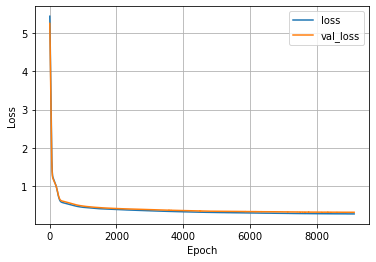

In [8]:
plot_loss(H)

# Evaluation

In [4]:
def evaluate_model(model, X, y, scaler=None):
    y_pred = model.predict(X)
    if scaler is not None:
        y_pred = scaler.inverse_transform(y_pred.reshape(-1, 1)).flatten()
        y = scaler.inverse_transform(y.reshape(-1, 1)).flatten()
    return r2_score(y, y_pred), calc_rmse(y, y_pred)

In [9]:
results = []
for name, (X_, y_) in zip(["Train", "Val.", "Test"],[(X_train, y_train), (X_val, y_val), (X_test, y_test)]):
    r2, rmse = evaluate_model(model, X_, y_)
    results.append([name, r2, rmse])
results_df = pd.DataFrame(results, columns=["Data", "R2", "RMSE"])
results_df

,Data,R2,RMSE
0,Train,0.793472,0.525598
1,Val.,0.751680,0.563856
2,Test,0.772071,0.551333


In [11]:
model.save("cal_house")

INFO:tensorflow:Assets written to: cal_house/assets
